# Chainer の学習済みモデル読み込み
- [Chainer Pre-trained models]http://docs.chainer.org/en/latest/reference/links.html?highlight=chainer%20vgg#machine-learning-models

「Chainerの」と書いたが、学習モデルは特にChainer用というわけではなくて、もとは Model Zoo （caffe 形式で書かれたデータのはず）のデータを変換したものと思われる。
　データは ~/.chainer/dataset/pfnet/chainer/modelsにchainerのセーブデータ形式で保存される。

In [1]:
from chainer.links import VGG16Layers
from chainer.links.model.vision.vgg import prepare as VGGprepare
mean = [103.939, 116.779, 123.68]
modelVGG = VGG16Layers()

# from chainer.links import GoogLeNet
# from chainer.links.model.vision.googlenet import prepare as GGprepare
# modelGoogle = GoogLeNet()

In [2]:
import numpy as np
import PIL.Image

def toImage(bat,mean=mean): 
    npimg = np.uint8(np.round(np.dstack(bat)+mean)[:,:,::-1])
    return PIL.Image.fromarray(np.uint8(npimg))

Chainer は caffe 用の 学習済みモデルを非常にお手軽に使えるようになっている。
画像を（バッチサイズ、チャネル数、高さ、幅）という numpy データに変換するための prepare というメソッドまで用意されている。このメソッドはそれぞれのモデル特有の画像サイズへのリサイズ、クロップ、平均値の減算までやってくれる。RGBからBGRへの変換もやってくれる。なんて便利な

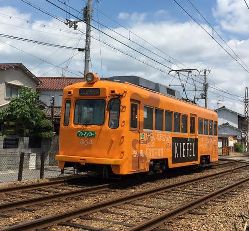

In [3]:
img = PIL.Image.open("train.jpg")
img.resize(np.array(img.size)//2)

In [219]:
# サイズ指定しない場合
npmodel = VGGprepare(img)
npmodel.shape

(3, 224, 224)

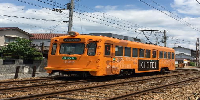

In [221]:
# サイズ指定してみると
toImage(VGGprepare(img,size=(200,100)))

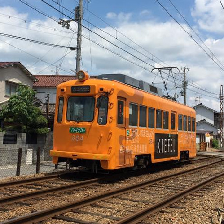

In [231]:
toImage(npmodel)

In [232]:
# レイヤーの名前を表示
modelVGG.available_layers

['conv1_1',
 'conv1_2',
 'pool1',
 'conv2_1',
 'conv2_2',
 'pool2',
 'conv3_1',
 'conv3_2',
 'conv3_3',
 'pool3',
 'conv4_1',
 'conv4_2',
 'conv4_3',
 'pool4',
 'conv5_1',
 'conv5_2',
 'conv5_3',
 'pool5',
 'fc6',
 'fc7',
 'fc8',
 'prob']

In [237]:
ext = modelVGG.extract([img],layers=['pool5'])['pool5']

In [238]:
ext.shape

(1, 512, 7, 7)

In [239]:
ans = modelVGG.predict([img])

In [240]:
top5 = np.argsort(ans[0].data)[:-6:-1]
top5prob = ans[0][top5].data

In [241]:
top5

array([705, 547, 829, 565, 820])

In [242]:
top5prob

array([  7.18187988e-01,   2.19122842e-01,   4.85507175e-02,
         1.30826039e-02,   4.14610375e-04], dtype=float32)

番号だけでは何が認識されたかわからないので word を読み込む。
```
wget -c http://dl.caffe.berkeleyvision.org/caffe_ilsvrc12.tar.gz
tar zxvf caffe_ilsvrc12.tar.gz
```
synset_words.txt というファイルがカテゴリ名のファイル

In [243]:
categories = np.loadtxt("synset_words.txt",str,delimiter='\t')
categories.shape

(1000,)

In [244]:
for rank,(p,words) in enumerate(zip(top5prob,categories[top5])):
    print(rank,words)
    # print("{}: {f:4.1} {}".format(rank,p))

0 n03895866 passenger car, coach, carriage
1 n03272562 electric locomotive
2 n04335435 streetcar, tram, tramcar, trolley, trolley car
3 n03393912 freight car
4 n04310018 steam locomotive


おおすばらしい

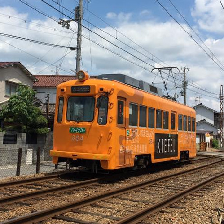

In [245]:
toImage(npmodel)

In [247]:
for rank,(p,words) in enumerate(zip(top5prob,categories[top5])):
    print(rank,words)
    # print("{}: {f:4.1} {}".format(rank,p))

0 n03895866 passenger car, coach, carriage
1 n03272562 electric locomotive
2 n04335435 streetcar, tram, tramcar, trolley, trolley car
3 n03393912 freight car
4 n04310018 steam locomotive


In [5]:
import numpy as np
a = np.arange(12).reshape(1,3,2,2).astype(np.float32)

In [3]:
# 基本入出力関数
# Add 
def add_mean(blob,mean):
    x = blob.copy()
    x[0,0,:,:] += mean[0]
    x[0,1,:,:] += mean[1]
    x[0,2,:,:] += mean[2]
    return x

In [ ]:
x = 3

ValueError: operands could not be broadcast together with shapes (3,2,2) (1,3) 